In [8]:
import pandas as pd
data = pd.read_excel('clean_ver.xlsx')
data=data.drop(columns=['Unnamed: 0'])
data['month'] = pd.DatetimeIndex(data['Date']).month
data.head()
data1=data[(data['year']==2020)& (data['month']!=10)& (data['month']!=11) & (data['month']!=12)]
data1

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,AQI,AQI_Bucket,year,month
1095,ahmedabad,2020-01-01,79.57,3.78,12.64,8.99,3.78,27.70,23.67,216,poor,2020,1
1096,ahmedabad,2020-02-01,72.59,3.63,14.38,9.73,3.63,23.96,23.67,162,moderate,2020,2
1097,ahmedabad,2020-03-01,69.54,7.06,15.13,12.65,7.06,35.78,23.66,220,poor,2020,3
1098,ahmedabad,2020-04-01,66.20,8.97,20.79,16.84,8.97,38.98,23.65,254,poor,2020,4
1099,ahmedabad,2020-05-01,55.99,5.41,15.34,11.53,5.41,45.83,23.61,255,poor,2020,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18002,visakhapatnam,2020-06-27,15.02,7.68,25.06,19.54,0.47,8.55,23.30,41,good,2020,6
18003,visakhapatnam,2020-06-28,24.38,3.42,26.06,16.53,0.52,12.72,30.14,70,satisfactory,2020,6
18004,visakhapatnam,2020-06-29,22.91,3.45,29.53,18.33,0.48,8.42,30.96,68,satisfactory,2020,6
18005,visakhapatnam,2020-06-30,16.64,4.05,29.26,18.80,0.52,9.84,28.30,54,satisfactory,2020,6


In [18]:
import numpy as np
np.corrcoef(data1['AQI'],data1['month'],rowvar=True)


array([[ 1.        , -0.18643661],
       [-0.18643661,  1.        ]])

correlation factor: -0.18643661000462727


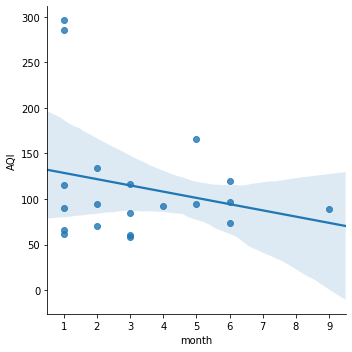

In [60]:
import matplotlib.pyplot as plt
from scipy import stats

x = [data1['month']]
y = [data1['AQI']]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

sns.lmplot(x='month',y='AQI',data=data1.sample(20))
print('correlation factor:',r)

In [39]:
City=data.groupby(data.City)
Delhi=City.get_group("delhi")
Delhi


,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,AQI,AQI_Bucket,year,month
6944,delhi,2017-01-01,191.50,103.24,66.19,55.29,1.31,25.13,50.03,332,very poor,2017,1
6945,delhi,2017-02-01,247.79,221.03,95.55,80.85,1.47,22.29,47.86,384,very poor,2017,2
6946,delhi,2017-03-01,255.33,155.29,90.79,53.89,1.28,25.33,42.90,373,very poor,2017,3
6947,delhi,2017-04-01,248.01,186.07,91.07,71.88,1.55,23.11,41.13,439,severe,2017,4
6948,delhi,2017-05-01,215.42,141.69,87.15,64.41,1.24,25.15,41.95,318,very poor,2017,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8217,delhi,2020-06-27,39.80,10.88,21.46,22.47,0.87,10.38,18.88,112,moderate,2020,6
8218,delhi,2020-06-28,59.52,12.67,21.60,23.86,0.94,10.70,18.05,196,moderate,2020,6
8219,delhi,2020-06-29,44.86,10.50,21.57,21.94,0.88,11.58,26.61,233,poor,2020,6
8220,delhi,2020-06-30,39.80,5.99,17.96,15.44,0.84,10.51,37.29,114,moderate,2020,6


In [42]:
data2=Delhi[(Delhi['year']!=2020)]
data2

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,AQI,AQI_Bucket,year,month
6944,delhi,2017-01-01,191.50,103.24,66.19,55.29,1.31,25.13,50.03,332,very poor,2017,1
6945,delhi,2017-02-01,247.79,221.03,95.55,80.85,1.47,22.29,47.86,384,very poor,2017,2
6946,delhi,2017-03-01,255.33,155.29,90.79,53.89,1.28,25.33,42.90,373,very poor,2017,3
6947,delhi,2017-04-01,248.01,186.07,91.07,71.88,1.55,23.11,41.13,439,severe,2017,4
6948,delhi,2017-05-01,215.42,141.69,87.15,64.41,1.24,25.15,41.95,318,very poor,2017,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8034,delhi,2019-12-27,240.07,28.66,54.60,54.95,1.39,7.88,27.55,372,very poor,2019,12
8035,delhi,2019-12-28,275.60,60.13,55.98,83.47,1.96,10.26,27.92,425,severe,2019,12
8036,delhi,2019-12-29,326.79,32.73,57.76,61.51,1.86,10.25,35.11,455,severe,2019,12
8037,delhi,2019-12-30,333.43,54.97,55.61,79.04,2.24,11.15,26.44,506,severe,2019,12


In [49]:
import numpy as np
np.corrcoef(data2['NOx'],data2['year'],rowvar=True)

array([[1.        , 0.23854895],
       [0.23854895, 1.        ]])

correlation factor: 0.23854895015135927


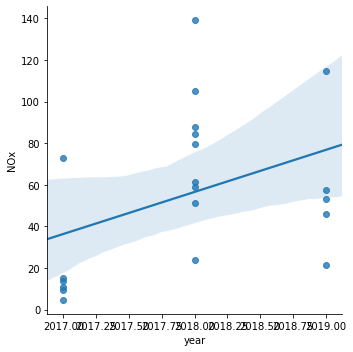

In [59]:
import matplotlib.pyplot as plt
from scipy import stats

x = [data2['year']]
y = [data2['NOx']]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

sns.lmplot(x='year',y='NOx',data=data2.sample(20))
print('correlation factor:',r)